## MACHINE LEARNING A/B TESTING

#### Importing Libraries

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [ ]:
# import libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
import scipy.stats as stat
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
from IPython.display import Image  

from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree


import warnings
warnings.filterwarnings('ignore')
import dvc.api

#### Importing Scripts 

In [58]:
from random_forest import RandomForestModel
from decision_tree import DecisionTreesModel
from logistic_regression import LogesticRegressionModel
#from xgboost import XgboostModel
from file import Myfile
import util
import plot


In [36]:
path = "../data/AdSmartABdata.csv"

In [37]:
# initialize the class that has utility function we are going to use
file = Myfile()

In [38]:
# we use our file function to read csv data
df = file.read_csv(path)

--> file read as csv


In [39]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,awareness
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,0
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,0
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,0


#### K-Fold Cross-validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. 

1. Logistic Regression
2. Decision Tree
3. XGBoost
4. RandomForest


#### Drop observations where users didn't respond to the questionaire

In [40]:
# drop columns where yes and no are both 0
drop_null = df.query('yes==0 and no==0') 
df=df.drop(drop_null.index)
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,awareness
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,0
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,0
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,0


#### Creating 'awarness' column

In [41]:
def data(tag, 
            path='data/AdSmartABdata.csv', 
            repo ='C:/Users/user/Desktop/10Academy/Smart-Ads-campaign-performance-analysis'
):
    rev = tag
    data_url = dvc.api.get_url(path=path, repo=repo, rev=rev)
    df = pd.read_csv(data_url)
    return df

In [42]:
# Function for creating an awareness column
def awareness (row):
    if row['yes'] == 1 :
         return '1'
    if row['no'] == 1 :
        return '0'
def calculate_metrics(y_test, y_preds):
    
    accuracy = accuracy_score(y_test, y_preds)
    return accuracy

In [43]:
# apply awareness to each row
df['awareness'] = df.apply (lambda row: awareness(row), axis=1) 
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,awareness
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,0
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,0
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,0


In [44]:
clean_data = "../data/AdSmartABdata.csv"
file.save_csv(df, clean_data)

--> File Successfully Saved.!!!


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,awareness
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,0
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,0
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1238,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0,1
1239,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0,1
1240,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1,0
1241,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1,0


#### Transform categorical variables to numerical value

In [45]:
# transform categorical variables to numerical value
lb = LabelEncoder()
df['awareness'] = lb.fit_transform(df['awareness'])
df['device_make'] = lb.fit_transform(df['device_make'])
df['date'] = lb.fit_transform(df['date'])
df['experiment'] = lb.fit_transform(df['experiment'])
df['browser'] = lb.fit_transform(df['browser'])

#### Data spliting by browser and platform

In [46]:
platfrom_df = df[["experiment", "hour", "date", 'device_make', 'platform_os', 'awareness']]
broweser_df = df[["experiment", "hour", "date", 'device_make', 'browser', 'awareness']]

In [47]:
platfrom_df.head()

,experiment,hour,date,device_make,platform_os,awareness
0,1,2,2,4,6,0
1,1,16,1,13,6,1
2,1,8,3,13,6,0
3,0,4,5,43,6,1
4,0,15,0,13,6,0


In [48]:
broweser_df.head()

,experiment,hour,date,device_make,browser,awareness
0,1,2,2,4,2,0
1,1,16,1,13,1,1
2,1,8,3,13,1,0
3,0,4,5,43,4,1
4,0,15,0,13,1,0


#### Save dataframes to DVC version

In [49]:
#file.save_csv(platfrom_df, "../data/AdSmartABdata.csv")


--> File Successfully Saved.!!!


,experiment,hour,date,device_make,platform_os,awareness
0,1,2,2,4,6,0
1,1,16,1,13,6,1
2,1,8,3,13,6,0
3,0,4,5,43,6,1
4,0,15,0,13,6,0
...,...,...,...,...,...,...
1238,1,21,2,13,6,1
1239,1,1,1,13,6,1
1240,0,7,6,13,6,0
1241,0,16,7,13,6,0


In [50]:
#file.save_csv(platfrom_df, "../data/AdSmartABdata.csv")

#### 1 Model training using Logestic Regression

##### 1.1 Model trainig using Logestic Regression using browser dataframe

In [52]:
feature_cols = ["experiment", "hour", "date", 'device_make', 'browser']

X = broweser_df[feature_cols]
y = broweser_df[['awareness']]

test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [62]:
logesticRegressionModel = LogesticRegressionModel(X_train, X_test,  y_train, y_test)

clf2, loss_arr_2, acc_arr_2 = logesticRegressionModel.train_model(5)

step 0: Validation Accuracy of LogesticRegression: 0.545
step 0: Validation Loss of LogesticRegression: 0.675

step 1: Validation Accuracy of LogesticRegression: 0.527
step 1: Validation Loss of LogesticRegression: 0.688

step 2: Validation Accuracy of LogesticRegression: 0.554
step 2: Validation Loss of LogesticRegression: 0.668

step 3: Validation Accuracy of LogesticRegression: 0.543
step 3: Validation Loss of LogesticRegression: 0.676

step 4: Validation Accuracy of LogesticRegression: 0.574
step 4: Validation Loss of LogesticRegression: 0.653



In [87]:
#test_acc2, test_loss2, report2, matrix2  = logesticRegressionModel.test_model()

In [74]:
def calculate_p_values(df):
    """ 
    Calcualting p_values for logestic regression.
    code refered from the following link
    https://gist.github.com/rspeare/77061e6e317896be29c6de9a85db301d
    
    """
    d = (2.0*(1.0+np.cosh(df.clf.decision_function(X))))
    d = np.tile(d,(X.shape[1],1)).T
    F_ij = np.dot((X/d).T,X) ## Fisher Information Matrix
    Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
    sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
    z_scores = df.clf.coef_[0]/sigma_estimates # z-score 
    p_values = [stat.norm.sf(abs(x)) for x in z_scores] ### two tailed test for p-values
        
    p_value_df = pd.DataFrame()
    p_value_df['features'] = df.X_train.columns.to_list()
    p_value_df['p_values'] = p_values
        
    return p_value_df
    
def plot_pvalues(self, p_value_df):
        
    fig, ax = plt.subplots(figsize=(12,7))

    ax.plot([0.05,0.05], [0.05,5])
    sns.scatterplot(data=p_value_df, y='features', x='p_values', color="green")
    plt.title("P values of features", size=20)

    plt.xticks(np.arange(0,max(p_value_df['p_values']) + 0.05, 0.05))

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()

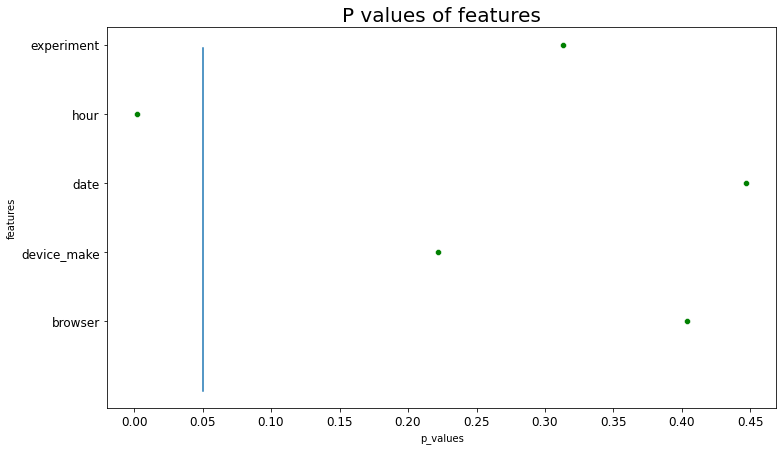

,features,p_values
0,experiment,0.313093
1,hour,0.002316
2,date,0.446756
3,device_make,0.221776
4,browser,0.403688


In [75]:
p_values_df = calculate_p_values(logesticRegressionModel)
plot_pvalues(logesticRegressionModel,p_values_df)
p_values_df

#### Analysis of the result

To have a significance p_value must be less than 0.05. therefor from the testing we analysis that:
* The highest contributing factor for the 'awarness' is 'hour__
  P-value of hour is 0.001

* The second contributing factor for the 'awarness' is 'device_make__
  P-value of device_make is 0.221 
* The least contributing factors are 'experiment & browser__
  'experiment' & 'browser' feature has no statistical siginficance means it is not contributing anything for the awareness. 


#### 1.2 Model training using Logestic Regression using platfrom dataframe

In [77]:
feature_cols = ["experiment", "hour", "date", 'device_make', 'platform_os']

X = platfrom_df[feature_cols]
y = platfrom_df[['awareness']]

test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [78]:
logesticRegressionModel = LogesticRegressionModel(X_train, X_test,  y_train, y_test)
clf2, loss_arr_2, acc_arr_2 = logesticRegressionModel.train_model(5)

step 0: Validation Accuracy of LogesticRegression: 0.518
step 0: Validation Loss of LogesticRegression: 0.694

step 1: Validation Accuracy of LogesticRegression: 0.500
step 1: Validation Loss of LogesticRegression: 0.707

step 2: Validation Accuracy of LogesticRegression: 0.558
step 2: Validation Loss of LogesticRegression: 0.665

step 3: Validation Accuracy of LogesticRegression: 0.534
step 3: Validation Loss of LogesticRegression: 0.683

step 4: Validation Accuracy of LogesticRegression: 0.552
step 4: Validation Loss of LogesticRegression: 0.670



In [86]:
#test_acc2, test_loss2, report2, matrix2  = logesticRegressionModel.test_model()

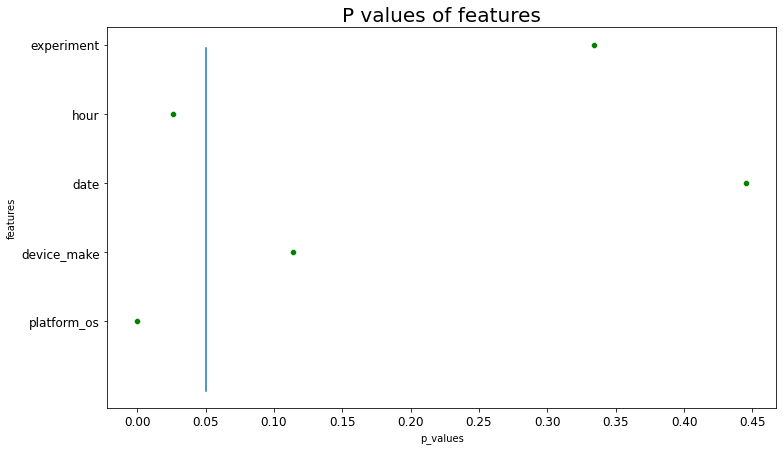

,features,p_values
0,experiment,3.340825e-01
1,hour,2.637949e-02
2,date,4.452749e-01
3,device_make,1.137725e-01
4,platform_os,4.231656e-87


In [84]:
p_values_df = calculate_p_values(logesticRegressionModel)
plot_pvalues(logesticRegressionModel,p_values_df)
p_values_df

### 2. Model training using Decision Tree 

#### 2.1 Model training using Decision Tree using browser dataframe

In [88]:
feature_columns = ["experiment", "hour", "date", 'device_make', 'browser']

X = broweser_df[feature_columns]
y = broweser_df[['awareness']]

test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [89]:
decisionTreesModel = DecisionTreesModel(X_train, X_test,  y_train, y_test)

clf, acc_arr, loss_arr = decisionTreesModel.train_model(5)

step 0: Validation Accuracy of DecisionTreesModel is: 0.571
step 0: Validation Loss of DecisionTreesModel is: 0.655

step 1: Validation Accuracy of DecisionTreesModel is: 0.531
step 1: Validation Loss of DecisionTreesModel is: 0.685

step 2: Validation Accuracy of DecisionTreesModel is: 0.558
step 2: Validation Loss of DecisionTreesModel is: 0.665

step 3: Validation Accuracy of DecisionTreesModel is: 0.507
step 3: Validation Loss of DecisionTreesModel is: 0.702

step 4: Validation Accuracy of DecisionTreesModel is: 0.565
step 4: Validation Loss of DecisionTreesModel is: 0.660



In [91]:
#test_acc, loss, report, confusion_matrix = decisionTreesModel.test_model()
#print(f"Loss on test data is: {loss:.3f}")
#print()

Calculating feature importance

In [92]:
decisionTreesModel.get_feature_importance()

,feature,feature_importances
0,experiment,0.000000
1,hour,0.401460
2,date,0.054408
3,device_make,0.336032
4,browser,0.208099


In [94]:
from random_forest import RandomForestModel
from decision_tree import DecisionTreesModel
from logistic_regression import LogesticRegressionModel